In [1]:
from music21 import *
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Get the analytic dataset into a pandas dataframe

dataset = pd.read_csv('analyticDataset.csv')
dataset.columns

Index(['Unnamed: 0', 'Chord', 'Composer', 'File', 'NormalForm', 'Offset',
       'PCsInNormalForm', 'beatNumber', 'measureNumber', 'pieceNumber',
       'pieceName', 'movementName', 'genre', 'publicationYear', 'Epoch',
       'Source', 'fileFormat', 'phraseAnalysis', 'fileConversion',
       'getChords'],
      dtype='object')

In [3]:
dataset.head()

,Unnamed: 0,Chord,Composer,File,NormalForm,Offset,PCsInNormalForm,beatNumber,measureNumber,pieceNumber,pieceName,movementName,genre,publicationYear,Epoch,Source,fileFormat,phraseAnalysis,fileConversion,getChords
0,0,<music21.chord.Chord E3>,AlariodelRio,AlariodelRio_Sol_Sostenido.xml,[0],0.0,[4],1.0,1.0,piece36,Piano Piece No8,Op7 No2,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y
1,1,<music21.chord.Chord A#3>,AlariodelRio,AlariodelRio_Sol_Sostenido.xml,[0],0.5,[10],1.25,1.0,piece36,Piano Piece No8,Op7 No2,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y
2,2,<music21.chord.Chord G#3>,AlariodelRio,AlariodelRio_Sol_Sostenido.xml,[0],1.0,[8],1.5,1.0,piece36,Piano Piece No8,Op7 No2,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y
3,3,<music21.chord.Chord D#3>,AlariodelRio,AlariodelRio_Sol_Sostenido.xml,[0],1.5,[3],1.75,1.0,piece36,Piano Piece No8,Op7 No2,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y
4,4,<music21.chord.Chord A#3>,AlariodelRio,AlariodelRio_Sol_Sostenido.xml,[0],2.0,[10],2.0,1.0,piece36,Piano Piece No8,Op7 No2,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y


In [4]:
# Convert chord string from YCAC csvs back to music21 chord object
def strToChord(chord_str):
    patt = '\<music21\.chord\.Chord ([^>]*)>'
    notes = re.findall(patt, chord_str)
    newChord = chord.Chord(notes[0].split())
    return newChord

In [5]:
# Define functions to apply to dataframe columns
def commonName(chrd):
    return chrd.commonName
def contains7(chrd):
    return chrd.containsSeventh()
def normalForm(chrd):
    return chrd.geometricNormalForm()

In [6]:
# Remove notes that don't fall on a downbeat
mask = dataset['Offset'].apply(lambda x: x.is_integer())
dataset = dataset.loc[mask]

In [7]:
# Create columns for common name and whether the chord contains a 7th
dataset['Chord'] = dataset['Chord'].apply(strToChord)
dataset['Common Names'] = dataset['Chord'].apply(commonName)
dataset['Contains 7th'] = dataset['Chord'].apply(contains7)

In [8]:
# Remove Unisons
dataset = dataset.loc[dataset['Common Names'] != 'unison']

In [9]:
dataset.columns

Index(['Unnamed: 0', 'Chord', 'Composer', 'File', 'NormalForm', 'Offset',
       'PCsInNormalForm', 'beatNumber', 'measureNumber', 'pieceNumber',
       'pieceName', 'movementName', 'genre', 'publicationYear', 'Epoch',
       'Source', 'fileFormat', 'phraseAnalysis', 'fileConversion', 'getChords',
       'Common Names', 'Contains 7th'],
      dtype='object')

In [10]:
dataset.head()

,Unnamed: 0,Chord,Composer,File,NormalForm,Offset,PCsInNormalForm,beatNumber,measureNumber,pieceNumber,...,genre,publicationYear,Epoch,Source,fileFormat,phraseAnalysis,fileConversion,getChords,Common Names,Contains 7th
18,18,"[<music21.note.Note G#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",9.0,"[4, 8]",2.5,2.0,piece36,...,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Twentieth,False
20,20,"[<music21.note.Note G#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",10.0,"[4, 8]",3.0,2.0,piece36,...,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Thirteenth,False
22,22,"[<music21.note.Note F#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",11.0,"[4, 6]",3.5,2.0,piece36,...,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Fourteenth,False
26,26,"[<music21.note.Note F#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",14.0,"[4, 6]",2.0,3.0,piece36,...,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Fourteenth,False
28,28,"[<music21.note.Note C#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 3]",15.0,"[1, 4]",2.5,3.0,piece36,...,OtherSolo,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Seventeenth,False


In [11]:
# Checks whether a chord is an extended chord based on the normal form representation
def isExtendedChord(c):
    nonExtendeds = ['[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 3, 6]', '[0, 4, 7]', '[0, 3, 7]', '[0, 4, 8]']
    if c in nonExtendeds:
        return 'Not Extended Chord'
    else:
        return 'Extended Chord'

In [12]:
dataset['isExtended'] = dataset['NormalForm'].apply(isExtendedChord)

In [13]:
dataset.head()

,Unnamed: 0,Chord,Composer,File,NormalForm,Offset,PCsInNormalForm,beatNumber,measureNumber,pieceNumber,...,publicationYear,Epoch,Source,fileFormat,phraseAnalysis,fileConversion,getChords,Common Names,Contains 7th,isExtended
18,18,"[<music21.note.Note G#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",9.0,"[4, 8]",2.5,2.0,piece36,...,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Twentieth,False,Not Extended Chord
20,20,"[<music21.note.Note G#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 4]",10.0,"[4, 8]",3.0,2.0,piece36,...,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Thirteenth,False,Not Extended Chord
22,22,"[<music21.note.Note F#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",11.0,"[4, 6]",3.5,2.0,piece36,...,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Fourteenth,False,Extended Chord
26,26,"[<music21.note.Note F#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 2]",14.0,"[4, 6]",2.0,3.0,piece36,...,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Fourteenth,False,Extended Chord
28,28,"[<music21.note.Note C#>, <music21.note.Note E>]",AlariodelRio,AlariodelRio_Sol_Sostenido.xml,"[0, 3]",15.0,"[1, 4]",2.5,3.0,piece36,...,2013,1970-2020,IMSLP,PDF,N,Y,Y,Minor Seventeenth,False,Not Extended Chord


Get all distinct values of the normal form representation, separately for chords classified as extended and not extended. 

In [176]:
extCounts=dataset[dataset['isExtended']=='Extended Chord']['NormalForm'].value_counts().rename_axis('NormalForm').reset_index(name='Count')
nonExtCounts=dataset[dataset['isExtended']=='Not Extended Chord']['NormalForm'].value_counts().rename_axis('NormalForm').reset_index(name='Count')
#extCounts

In [204]:
#extNames=dataset[dataset['isExtended']=='Extended Chord'].groupby('NormalForm')['Common Names'].unique().reset_index(name='Common Names')
#nonExtNames=dataset[dataset['isExtended']=='Not Extended Chord'].groupby('NormalForm')['Common Names'].unique().reset_index(name='Common Names')
#extNames
extgroup=dataset[dataset['isExtended']=='Extended Chord'].groupby('NormalForm')
extNames=extgroup.apply(lambda x: x['Common Names'].unique()) 
extNames=extNames.apply(pd.Series)
extNames.fillna('',inplace=True)
#extNames

nonExtgroup=dataset[dataset['isExtended']=='Not Extended Chord'].groupby('NormalForm')
nonExtNames=nonExtgroup.apply(lambda x: x['Common Names'].unique()) 
nonExtNames=nonExtNames.apply(pd.Series)
nonExtNames.fillna('',inplace=True)


In [205]:
extTypes=extCounts.merge(extNames, on='NormalForm')
nonExtTypes=nonExtCounts.merge(nonExtNames, on='NormalForm')
#extTypes

In [206]:
extTypes.to_csv('extendedTypes.csv',header=True)
nonExtTypes.to_csv('nonExtendedTypes.csv',header=True)

Proportion of extended chords overall and by epoch

In [16]:
raw_extendeds = dataset['isExtended'].value_counts()

In [17]:
raw_extendeds

Not Extended Chord    4201
Extended Chord        2761
Name: isExtended, dtype: int64

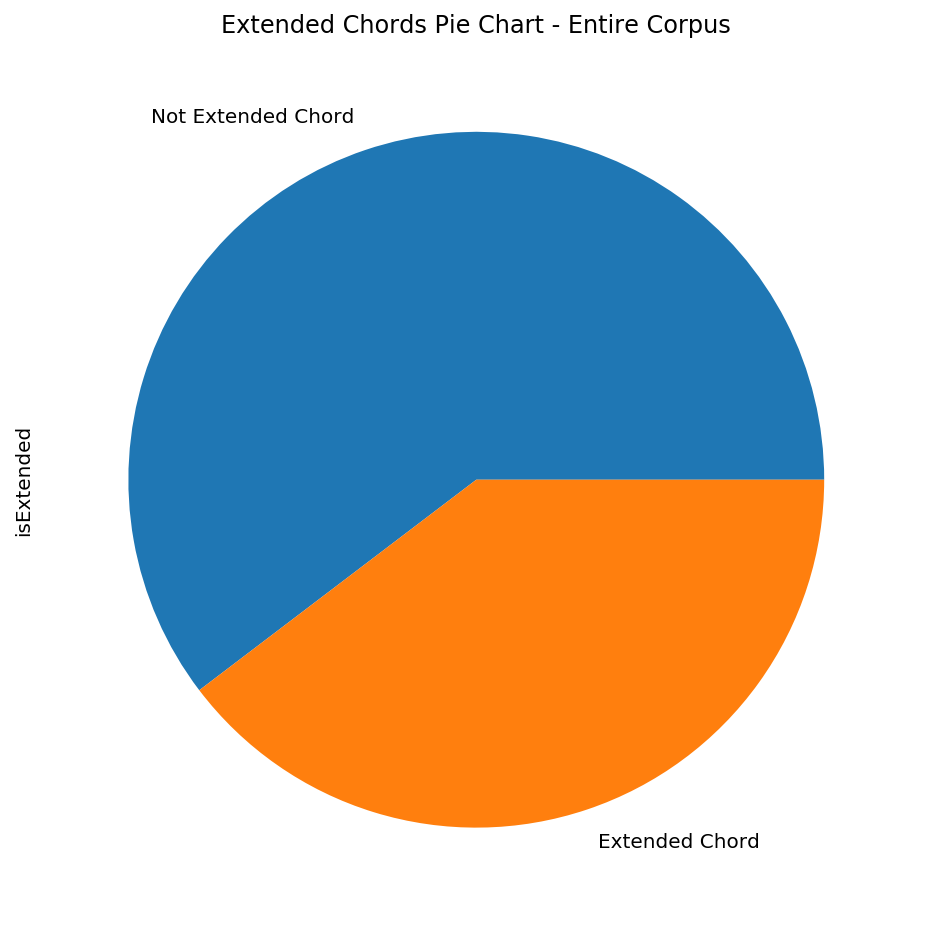

In [18]:
# Plot distribution of chord types
piePlot = raw_extendeds.plot(kind='pie', figsize=(8,8), title='Extended Chords Pie Chart - Entire Corpus')

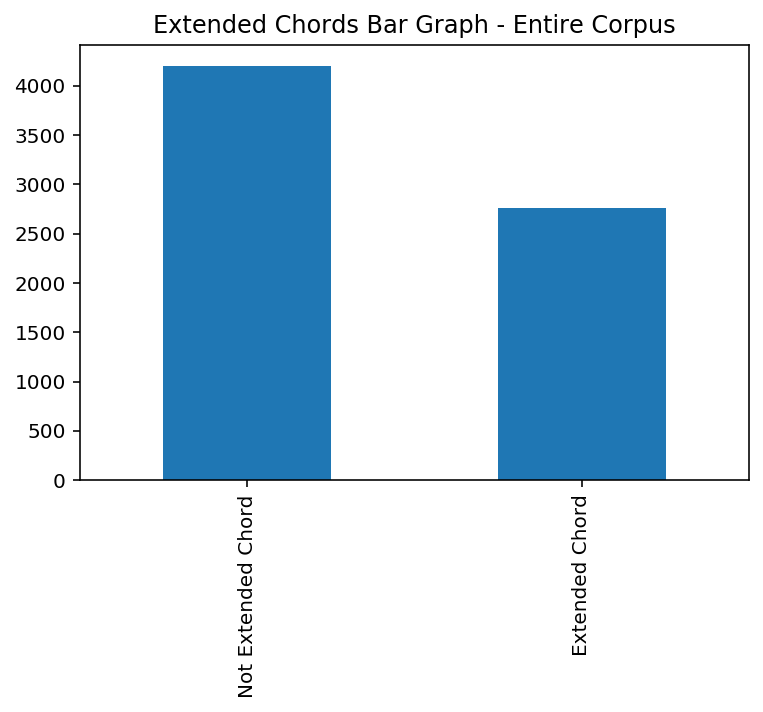

In [19]:
#barPlot = raw_extendeds.plot(kind='bar', title='Extended Chords Bar Graph - Entire Corpus', ylabel='Counts')
barPlot = raw_extendeds.plot(kind='bar', title='Extended Chords Bar Graph - Entire Corpus')

In [20]:
by_epoch = dataset.groupby(by='Epoch')
values = by_epoch['isExtended'].value_counts()

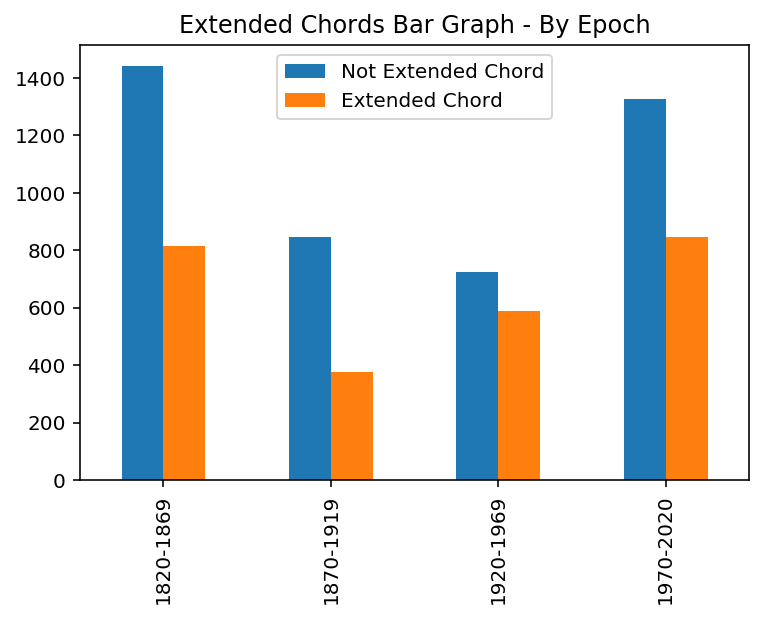

In [21]:
#Reorganize the dataframe for easy graphing
non_extended = []
extended = []
index = ['1820-1869', '1870-1919', '1920-1969', '1970-2020']
for i in range(len(values)):
    if i % 2 == 0:
        non_extended.append(values[i])
    else:
        extended.append(values[i])
new_epochdf = pd.DataFrame({'Not Extended Chord': non_extended, 'Extended Chord': extended}, index=index)
#new_epochdf.plot(kind='bar', title='Extended Chords Bar Graph - By Epoch', ylabel='Counts')
new_epochdf.plot(kind='bar', title='Extended Chords Bar Graph - By Epoch')

Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
def extendedbinary(x):
    if x=="Extended Chord":
        return 1
    else:
        return 0

In [24]:
dataset['extendedInd'] = dataset['isExtended'].apply(extendedbinary)

In [33]:
X = dataset['publicationYear']
Y = dataset['extendedInd']

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
X=sm.add_constant(X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672189
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:            extendedInd   No. Observations:                 6962
Model:                          Logit   Df Residuals:                     6961
Method:                           MLE   Df Model:                            0
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:              -0.0008759
Time:                        11:25:57   Log-Likelihood:                -4679.8
converged:                       True   LL-Null:                       -4675.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
publicationYear    -0.0002   1.28e-05    -16.901      0.000      -0.000      -0.000


In [32]:
import statsmodels.api as sm
sm.tools.tools.add_constant(X)
Xnew=sm.tools.tools.add_constant(X)
logit_model=sm.Logit(Y,Xnew)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.668669
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            extendedInd   No. Observations:                 6962
Model:                          Logit   Df Residuals:                     6960
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                0.004365
Time:                        11:24:47   Log-Likelihood:                -4655.3
converged:                       True   LL-Null:                       -4675.7
Covariance Type:            nonrobust   LLR p-value:                 1.668e-10
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.7777      0.684     -6.985      0.000      -6.118      -3.437
publicationYea

Double check results: compare with GLM method

In [43]:
glm=sm.GLM(Y, Xnew, family=sm.families.Binomial())

In [48]:
glmfit=glm.fit()

In [50]:
glmfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            extendedInd   No. Observations:                 6962
Model:                            GLM   Df Residuals:                     6960
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4655.3
Date:                Mon, 30 Nov 2020   Deviance:                       9310.6
Time:                        11:47:37   Pearson chi2:                 6.96e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.7777      0.684     -6.985      0.000      -6.118      -3.437
publicationYear     0.0023      0.000      6.379      0.000       0.002       0.003
===================================================================================
"""

Bubble plot: proportion of extended chords by piece, bubble size proportional to number of chords in the piece

In [25]:
fileyr=

,Unnamed: 0,pieceName,movementName,genre,Composer,publicationYear,Epoch,Source,fileFormat,phraseAnalysis,fileConversion,getChords
0,piece1,25 Preludes Premiere,Suite 9 Placiditas Tranquillement in E major,Prelude,Alkan,1844,1820-1869,YCAC,CSV,N,NaN,NaN
1,piece2,Etudes Op100,No10 Tendre Fleur D Major,Etude,Burgmuller,1858,1820-1869,YCAC,CSV,Y,NaN,NaN
2,piece3,Nocturne Op55,No1,Nocturne F Minor,Chopin,1843,1820-1869,YCAC,CSV,Y,NaN,NaN
3,piece4,Etudes Op299,No9 C Major,Etude,Czerny,1830,1820-1869,YCAC,CSV,Y,NaN,NaN
4,piece5,Six Bagatelles Op107,VI Rondo all Ungarese C Major,Bagatelle,Hummel,1827,1820-1869,YCAC,CSV,N,NaN,NaN
5,piece6,S248,La Cloches Sonne C Minor,CharacterPiece,Liszt,1850,1820-1869,YCAC,CSV,Y,NaN,NaN
6,piece7,Songs without Words Op102,No1 E Minor,CharacterPiece,Mendelssohn,1843,1820-1869,YCAC,CSV,Y,NaN,NaN
7,piece8,D850 II,Con Moto A Major,SoloSonata,Schubert,1825,1820-1869,YCAC,CSV,Y,NaN,NaN
8,piece9,Waldszenen Op82,Verrufene Stelle D minor,CharacterPiece,Schumann,1849,1820-1869,YCAC,CSV,Y,NaN,NaN
9,piece10,Studi-Poetici Op53,No12 Rimprovero G-sharp Minor,Etude,Haberbier,1861,1820-1869,YCAC,CSV,N,NaN,NaN


In [37]:
fileyr=dataset.groupby(['File','publicationYear']).size().reset_index().rename(columns={0:'count'})
#fileyr

In [54]:
weight = pd.crosstab(dataset['File'], dataset['isExtended'])
#weight

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

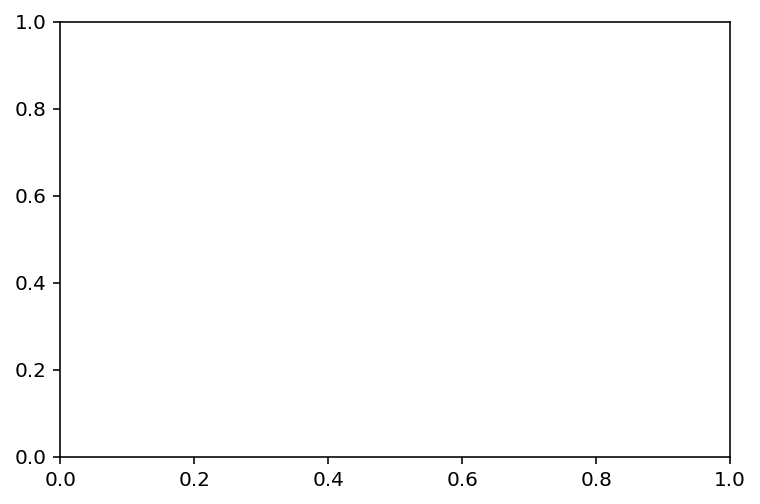

In [57]:
weight['Total'] = weight['Extended Chord'] + weight['Not Extended Chord']
weight['Extended Percentage'] = weight['Extended Chord'] / weight['Total']
weight_and_year = pd.merge(weight, fileyr,how='left',on='File')

weight_and_year.plot.scatter('publicationYear', 'Extended Percentage',s='Total')

Text(0, 0.5, 'Proportion of Chords that are Extended')

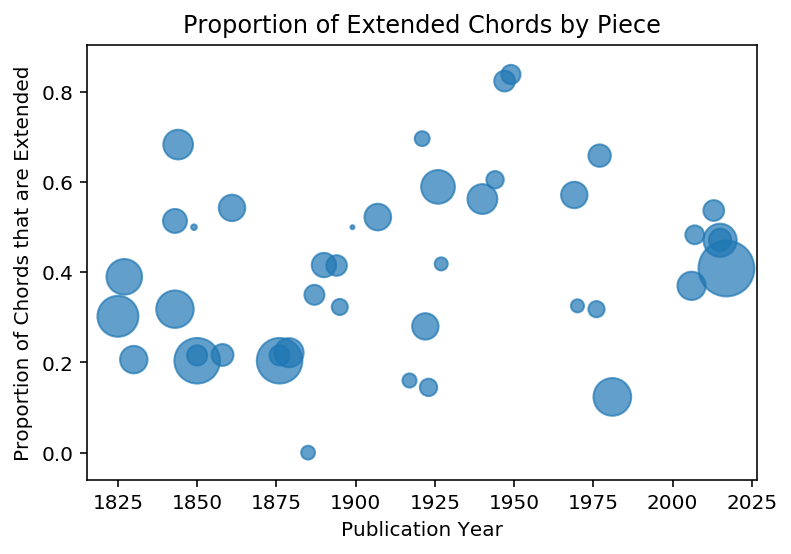

In [63]:
weight['Total'] = weight['Extended Chord'] + weight['Not Extended Chord']
weight['Extended Percentage'] = weight['Extended Chord'] / weight['Total']
weight_and_year = pd.merge(weight, fileyr,how='left',on='File')
yr=weight_and_year['publicationYear']
pct=weight_and_year['Extended Percentage']
total=weight_and_year['Total']
plt.scatter(yr, pct, s=total,alpha=0.7)
plt.title('Proportion of Extended Chords by Piece')
plt.xlabel('Publication Year')
plt.ylabel('Proportion of Chords that are Extended')